In [4]:
from google.colab import drive
drive.mount('/gdrive')

file_path = '/gdrive/My Drive/Colab Notebooks/eeg_tumor.csv' #seizure데이터인데 이름을 tumor로 잘못저장했습니다
#file_path = '/gdrive/My Drive/Colab_Notebooks/eeg_seizure1.csv' #링크가 살짝 다른사용자와 공유하면서 코드 편집해서 구분하였습니다. 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(file_path)
print(df.shape)
df.head()

(4600, 181)


,Unnamed: 0,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,0,X7.V1.13,-53,-42,-37,-41,-41,-35,-31,-35,...,12,21,40,51,49,38,36,41,43,0
1,1,X3.V1.213,-41,-32,-29,-26,-32,-32,-30,-31,...,71,74,73,70,65,59,50,40,26,0
2,2,X9.V1.941,105,143,153,120,33,-58,-131,-167,...,100,114,118,108,84,49,6,-39,-79,0
3,3,X5.V1.484,314,256,236,395,590,631,41,-984,...,-213,-39,111,268,375,439,449,425,373,1
4,4,X18.V1.404,-50,-546,-837,-707,-396,-75,96,137,...,186,192,200,205,212,216,218,215,214,1


In [6]:
Y = df['y']
X = df.drop(labels='Unnamed',axis=1)
X = X.drop(labels='Unnamed: 0',axis=1)
X = X.drop(labels='y',axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,-53,-42,-37,-41,-41,-35,-31,-35,-34,-34,...,10,12,21,40,51,49,38,36,41,43
1,-41,-32,-29,-26,-32,-32,-30,-31,-36,-44,...,68,71,74,73,70,65,59,50,40,26
2,105,143,153,120,33,-58,-131,-167,-174,-158,...,57,100,114,118,108,84,49,6,-39,-79
3,314,256,236,395,590,631,41,-984,-1775,-1862,...,-344,-213,-39,111,268,375,439,449,425,373
4,-50,-546,-837,-707,-396,-75,96,137,121,84,...,179,186,192,200,205,212,216,218,215,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-189,-329,-462,-557,-686,-932,-1289,-1381,-1140,-577,...,-428,-57,265,369,346,227,-3,-357,-598,-623
4596,264,168,45,-41,-106,-109,-87,-66,-60,-77,...,-105,-40,6,61,107,173,137,37,-75,-119
4597,-574,-485,-380,-234,-92,33,169,282,350,398,...,27,80,57,15,-42,-145,-262,-415,-507,-538
4598,-42,-81,-83,-68,-49,-25,-12,-9,7,28,...,-31,-35,-57,-85,-84,-75,-44,8,52,56


In [7]:
Y

0       0
1       0
2       0
3       1
4       1
       ..
4595    1
4596    1
4597    1
4598    0
4599    1
Name: y, Length: 4600, dtype: int64

In [8]:
X=X.to_numpy()
X.shape

(4600, 178)

In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

plt.style.use('ggplot')

In [10]:
# 3.b 

# Z-Score normalization 
from sklearn.preprocessing import StandardScaler

# create the object
scaler = StandardScaler()

# Calculate the mean and stdev
scaler.fit(X)

# Transform the values
X_scaled = scaler.transform(X)

PCA (Principal Component Analysis)

(4600, 2)


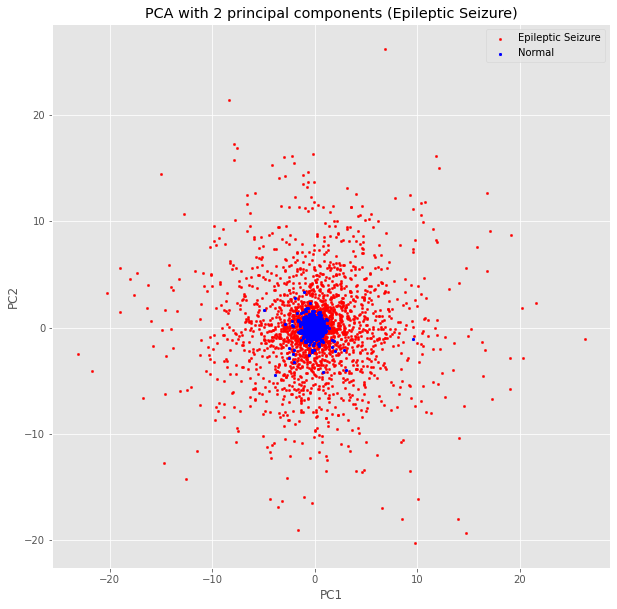

In [11]:
# n_components = 2

from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2, random_state=2020) 
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)
print(X_pca_2.shape)

plt.figure(figsize=(10,10))
x = X_pca_2[:,0]
y = X_pca_2[:,1]

ipos = np.where(Y==1)
ineg = np.where(Y==0)

plt.scatter(x[ipos], y[ipos], label = 'Epileptic Seizure', color='r', marker="o", s=5)
plt.scatter(x[ineg], y[ineg], label = 'Normal', color='b', marker="x", s=5)
plt.title("PCA with 2 principal components (Epileptic Seizure)")
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

df_new = pd.DataFrame(X_pca_2, columns=['PC1','PC2'])
df_new['label'] = Y

df_new.to_csv('newdata_pca_2.csv',index = False) 

(4600, 3)


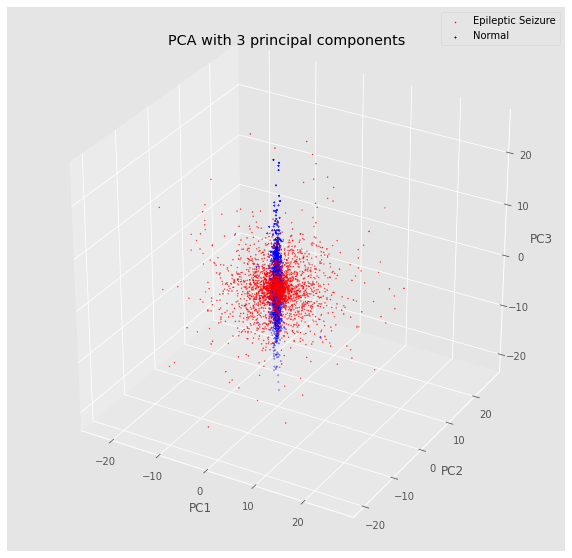

In [12]:
# n_components = 3

from sklearn.decomposition import PCA

pca_3 = PCA(n_components=3, random_state=2020) 
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)
print(X_pca_3.shape)

x = X_pca_3[:,0]
y = X_pca_3[:,1]
z = X_pca_3[:,2]

ipos = np.where(Y==1)
ineg = np.where(Y==0)

fig = plt.figure(figsize=(10,10))
graph = fig.gca(projection='3d')

graph.scatter(x[ipos], y[ipos], z[ipos], label = 'Epileptic Seizure', color='r', marker="o", s=1)
graph.scatter(x[ineg], y[ineg], z[ipos], label = 'Normal', color='b', marker="x", s=1)
graph.set_title("PCA with 3 principal components")
plt.legend()
graph.set_xlabel('PC1')
graph.set_ylabel('PC2')
graph.set_zlabel('PC3')

df_new = pd.DataFrame(X_pca_3, columns=['PC1','PC2','PC3'])
df_new['label'] = Y

df_new.to_csv('newdata_pca_3.csv',index = False) 

(4600, 10)


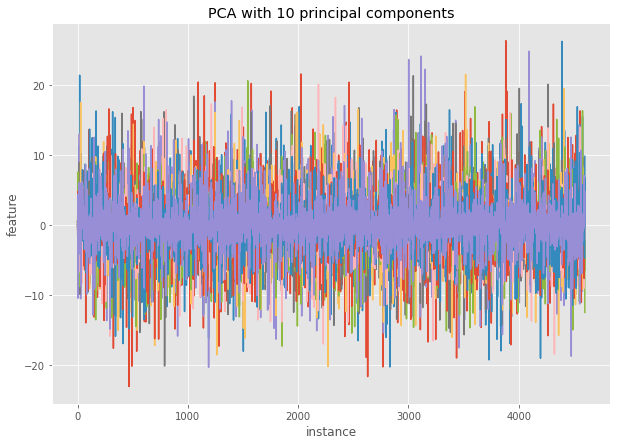

In [13]:
# n_components = 10

from sklearn.decomposition import PCA

pca_10 = PCA(n_components=10, random_state=2020) 
pca_10.fit(X_scaled)
X_pca_10 = pca_10.transform(X_scaled)
print(X_pca_10.shape)

plt.figure(figsize=(10,7))
plt.plot(X_pca_10)
plt.title("PCA with 10 principal components")
plt.xlabel('instance')
plt.ylabel('feature')

df_new = pd.DataFrame(X_pca_10, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df_new['label'] = Y

# new dataset을 새로운 csv 파일로 저장 
df_new.to_csv('newdata_pca_10.csv',index = False) 

(4600, 17)


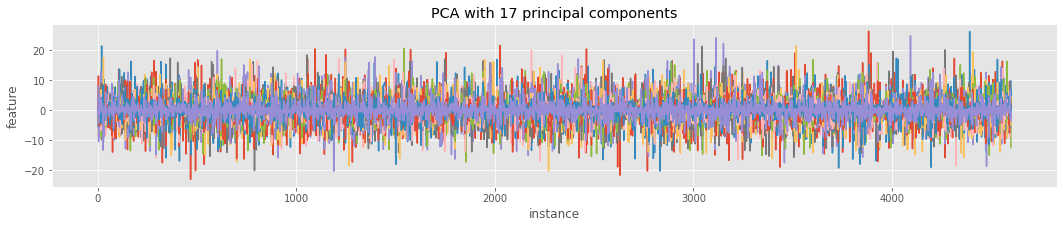

In [14]:
# n_components = 17

from sklearn.decomposition import PCA

pca_17 = PCA(n_components=17, random_state=2020) 
pca_17.fit(X_scaled)
X_pca_17 = pca_17.transform(X_scaled)
print(X_pca_17.shape)

plt.figure(figsize=(18,3))
plt.plot(X_pca_17)
plt.title("PCA with 17 principal components")
plt.xlabel('instance')
plt.ylabel('feature')

df_new = pd.DataFrame(X_pca_17, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
df_new['label'] = Y

#new dataset을 새로운 csv 파일로 저장 
df_new.to_csv('newdata_pca_17.csv',index = False) # 행 인덱스 레이블이 파일에 저장되지 않음 

(4600, 34)


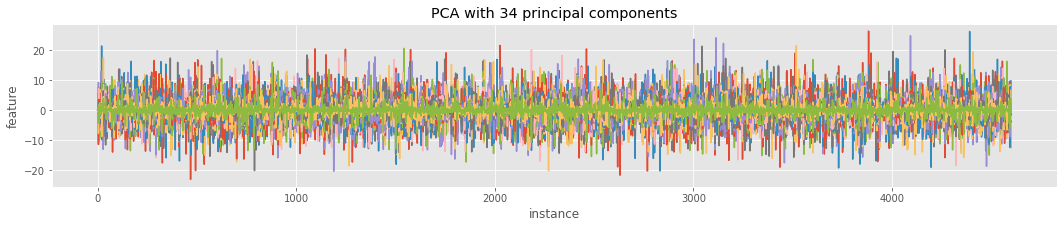

In [15]:
# n_components = 34

from sklearn.decomposition import PCA

pca_34 = PCA(n_components=34, random_state=2020) 
pca_34.fit(X_scaled)
X_pca_34 = pca_34.transform(X_scaled)
print(X_pca_34.shape)

plt.figure(figsize=(18,3))
plt.plot(X_pca_34)
plt.title("PCA with 34 principal components")
plt.xlabel('instance')
plt.ylabel('feature')

df_new = pd.DataFrame(X_pca_34, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34'])
df_new['label'] = Y

#new dataset을 새로운 csv 파일로 저장 
df_new.to_csv('newdata_pca_34.csv',index = False) # 행 인덱스 레이블이 파일에 저장되지 않음 

Label Drop

In [16]:
Y = df_new['label']
X = df_new.drop(labels='label',axis=1)

Classifier Model Selection

In [17]:
from sklearn import svm
model1 = svm.SVC(kernel='rbf', random_state=123)

In [18]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear',random_state=123)

In [19]:
from sklearn.neural_network import MLPClassifier
model3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=123)

In [20]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

학습 이미지: (3680, 34)
학습 레이블: (3680,)
테스트 이미지: (920, 34)
테스트 레이블: (920,)
학습 데이터셋 정확도: 0.9605978260869565
검증 데이터셋 정확도: 0.9543478260869566


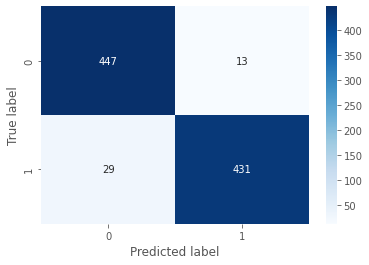

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=1)
print('학습 이미지:', X_train.shape)
print('학습 레이블:', Y_train.shape)
print('테스트 이미지:', X_test.shape)
print('테스트 레이블:', Y_test.shape)

#Train the model using the training sets
model1.fit(X_train, Y_train)

Y_pred = model1.predict(X_train)
train_acc = accuracy_score(Y_train, Y_pred)
print('학습 데이터셋 정확도:', train_acc)

#Predict the response for test dataset
Y_pred = model1.predict(X_test)
test_acc = accuracy_score(Y_test, Y_pred)
print('검증 데이터셋 정확도:', test_acc)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


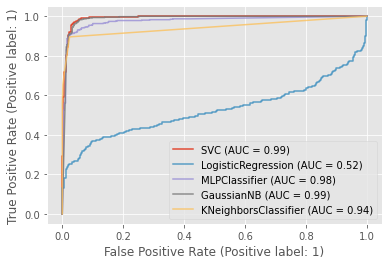

In [23]:
model1.fit(X_train, Y_train)
svc_disp = RocCurveDisplay.from_estimator(model1, X_test, Y_test)

model2.fit(X_train, Y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model2, X_test, Y_test, ax=ax, alpha=0.8)

model3.fit(X_train, Y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model3, X_test, Y_test, ax=ax, alpha=0.8)

model4.fit(X_train, Y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model4, X_test, Y_test, ax=ax, alpha=0.8)

model5.fit(X_train, Y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(model5, X_test, Y_test, ax=ax, alpha=0.8)

KFold

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=123)
scoring = 'accuracy'
score = cross_val_score(model1, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print("점수 평균 : " + str(np.mean(score)))

[0.95543478 0.94565217 0.95326087 0.96195652 0.9576087 ]
점수 평균 : 0.9547826086956521
